# Mace's SMK data exploration

Using the data [SMK](https://smk.dk) provides as Open Data.

![](https://www.smk.dk/wp-content/uploads/2018/07/DSC6791-15_01-e1559653704558-1600x1200.jpg)

In [1]:
import pandas as pd
import altair as alt
import hashlib
import requests

## Data

Downloaded the dataset [`smk-online-collection-json`](http://ckan.smk.dk/dataset/smk-online-collection-json) from [SMK's CKAN](http://ckan.smk.dk/) instance on [2019-11-11](http://ckan.smk.dk/dataset/50bee9b0-05e5-4544-aea6-a77d540c2550/resource/2cf91736-3f07-4ac0-892b-d751e019e143/download/smk_all_artworks.json). Its MD5 sum for the file is `83edafa71f53e51f45258c248b928e44`.

In [34]:
assert hashlib.md5(open('smk_all_artworks.json','rb').read()).hexdigest() == '83edafa71f53e51f45258c248b928e44'

Let's see the JSON data.

In [3]:
%%time
smk = pd.read_json('smk_all_artworks.json')

CPU times: user 8.18 s, sys: 1.52 s, total: 9.7 s
Wall time: 15.8 s


In [4]:
smk.shape

(79004, 53)

In [5]:
smk.columns

Index(['on_display', 'object_number', 'modified', 'id', 'rights', 'titles',
       'production', 'iiif_manifest', 'production_date', 'techniques',
       'created', 'object_names', 'has_image', 'public_domain', 'dimensions',
       'responsible_department', 'inscriptions', 'credit_line',
       'acquisition_date_precision', 'frame_notes', 'image_iiif_info',
       'image_native', 'image_orientation', 'image_height',
       'alternative_images', 'image_width', 'number_of_parts', 'image_iiif_id',
       'part_of', 'image_thumbnail', 'colors', 'image_size', 'image_mime_type',
       'image_cropped', 'distinguishing_features', 'notes', 'related_objects',
       'object_history_note', 'collection', 'production_dates_notes',
       'exhibitions', 'documentation', 'content_description', 'content_person',
       'work_status', 'materials', 'parts', 'content_subject',
       'acquisition_date', 'current_location_name', 'labels', 'image_type',
       'current_location_date'],
      dtype='object

In [6]:
pd.options.display.max_columns = 60

In [7]:
smk.sample(5)

on_display object_number                  modified                 id  \
72093       False       KMS8403 2019-08-12 09:48:37+00:00  1180075397_object   
5369        False    KKS1972-61 2019-08-08 12:57:20+00:00  1180005636_object   
60916       False     KKSgb4027 2019-08-12 09:44:16+00:00  1180063736_object   
13435       False   KKS1980-305 2019-08-08 03:25:26+00:00  1180014055_object   
67099       False    KKS2003-76 2019-08-08 05:46:21+00:00  1180070201_object   

                                                  rights  \
72093            https://en.wikipedia.org/wiki/Copyright   
5369             https://en.wikipedia.org/wiki/Copyright   
60916  https://creativecommons.org/share-your-work/pu...   
13435            https://en.wikipedia.org/wiki/Copyright   
67099            https://en.wikipedia.org/wiki/Copyright   

                                                  titles  \
72093  [{'type': 'ARTIST', 'title': 'Body', 'language...   
5369   [{'type': 'MUSEUM', 'title': 'Plakat til Å-uds...   
60916                  [{'title': 'Prospekt af Korsør'}]   
13435  [{'type': 'ARTIST', 'title': 'Narren og kvinde...   
67099  [{'title': 'Skitsebog. Nordsjælland, Nordjylla...   

                                              production  \
72093  [{'creator': 'Landgreen, Malene', 'creator_lre...   
5369   [{'creator': 'Andersen, Mogens', 'creator_date...   
60916  [{'creator': 'Eckersberg, C.W.', 'creator_date...   
13435  [{'creator_nationality': 'dansk', 'creator': '...   
67099  [{'creator_nationality': 'dansk', 'creator': '...   

                                           iiif_manifest  \
72093  https://api.smk.dk/api/v1/iiif/manifest/?id=km...   
5369   https://api.smk.dk/api/v1/iiif/manifest/?id=kk...   
60916  https://api.smk.dk/api/v1/iiif/manifest/?id=kk...   
13435  https://api.smk.dk/api/v1/iiif/manifest/?id=kk...   
67099  https://api.smk.dk/api/v1/iiif/manifest/?id=kk...   

                                         production_date  \
72093  [{'period': '2005', 'start': '2005-01-01T00:00...   
5369   [{'period': '1970', 'start': '1969-12-31T00:00...   
60916  [{'period': 'Ca. 1810 ', 'start': '1808-01-01T...   
13435  [{'period': '1922 - 1973', 'start': '1921-11-2...   
67099  [{'period': '1938 ', 'start': '1938-01-01T00:0...   

                                              techniques  \
72093                 [{'technique': 'Akryl på lærred'}]   
5369                         [{'technique': 'Plantryk'}]   
60916  [{'technique': 'Blyant, pensel og grå lavering'}]   
13435  [{'technique': 'Oliekridt over blyant, indramm...   
67099         [{'technique': 'blyant, lidt blåt kridt'}]   

                    created            object_names  has_image  public_domain  \
72093  2019-08-07T07:45:10Z    [{'name': 'maleri'}]       True          False   
5369   2019-08-07T03:40:56Z  [{'name': 'plantryk'}]      False          False   
60916  2019-08-07T06:58:29Z   [{'name': 'tegning'}]       True           True   
13435  2019-08-07T04:06:31Z   [{'name': 'tegning'}]      False          False   
67099  2019-08-07T07:24:22Z   [{'name': 'tegning'}]      False          False   

                                              dimensions  \
72093  [{'part': 'netto', 'type': 'hojde', 'notes': '...   
5369   [{'part': 'bladmaal', 'type': 'hojde', 'unit':...   
60916  [{'part': 'bladmaal', 'type': 'hojde', 'notes'...   
13435  [{'part': 'bladmaal', 'type': 'hojde', 'unit':...   
67099  [{'part': 'monteringsmaal', 'type': 'hojde', '...   

           responsible_department  \
72093  Samling og Forskning (KMS)   
5369   Samling og Forskning (KKS)   
60916  Samling og Forskning (KKS)   
13435  Samling og Forskning (KKS)   
67099  Samling og Forskning (KKS)   

                                            inscriptions  \
72093  [{'position': 'f.o.t.v.', 'content': 'Malene L...   
5369                             [{'language': 'Dansk'}]   
60916  [{'content': 'Påskrift med blyant f.n.t.v. auk...   
13435                            [{'language': 'D

Filtering suggesting by Anders

> * `has_image`
> * `image_native` (or `image_iiif_info`) - filter for only those that have images in iiif format? Because those are likely up-to-date quality and more relevant
> * Public domain - if we limit to that, we are free to publish the data anywhere. If not, we can still publish but not in full resolution (up to ca. 3000px is supposedly ok).
> * `object_names` - we could use this to make a selection according to different depiction techniques: drawing, painting, etching etc.
> we could also use `production_date` to make a selection according to different time periods - but that is not as relevant I think (unless e.g. we wanted to exclude everything abstract, we could theoretically exclude everything from 1900 onwards...)

### What's in `has_image`?

In [8]:
smk.has_image.unique()

array([False,  True])

In [9]:
smk.groupby('has_image').size()

has_image
False    34263
True     44741
dtype: int64

### What's in `image_native` and `image_iiif_info`?

In [10]:
smk.image_native.unique()

array([nan,
       'https://iip.smk.dk/iiif/jp2/pc4-28-02-05_-_122.tif.reconstructed.tif.jp2/full/full/0/native.jpg',
       'https://api.smk.dk/api/v1/thumbnail/547d7074-9c88-4891-9e1d-6dad9f732b9d.jpg',
       ...,
       'https://api.smk.dk/api/v1/thumbnail/891c2cf4-8e51-455a-be4b-4e7a3948ce1d.jpg',
       'https://iip.smk.dk/iiif/jp2/KKS1987-230_1.TIF.reconstructed.tif.jp2/full/full/0/native.jpg',
       'https://iip.smk.dk/iiif/jp2/pc4-09-06-05_-_029.tif.reconstructed.tif.jp2/full/full/0/native.jpg'],
      dtype=object)

IIIF = *International Image Interoperability Framework*. Let's see what the file extensions there are.

In [11]:
smk.groupby(smk.image_native.dropna().str.rsplit('.', 1).map(lambda l: l[-1])).size()

image_native
JPG     1205
jpg    43536
dtype: int64

Yeah 💪 functional Python.

What about the IIIF info, what's in there?

In [12]:
smk.image_iiif_info.unique()

array([nan,
       'https://iip.smk.dk/iiif/jp2/pc4-28-02-05_-_122.tif.reconstructed.tif.jp2/info.json',
       'https://iip.smk.dk/iiif/jp2/pc4-15-03-2005_-_009.tif.reconstructed.tif.jp2/info.json',
       ...,
       'http://iip.smk.dk/iiif/jp2/pc4-15-06-04_022.tif.jp2/info.json',
       'http://iip.smk.dk/iiif/jp2/KKS1987-230_1.TIF.reconstructed.tif.jp2/info.json',
       'http://iip.smk.dk/iiif/jp2/pc4-09-06-05_-_029.tif.reconstructed.tif.jp2/info.json'],
      dtype=object)

How many `NaN`s have we got in there?

In [13]:
len(smk.image_iiif_info), len(smk.image_iiif_info.dropna())

(79004, 28911)

Ok what's at the end of it?

In [14]:
requests.get(smk.image_iiif_info.dropna().sample(1).values[0]).json()

{'@context': 'http://iiif.io/api/image/2/context.json',
 '@id': 'https://iip.smk.dk/iiif/jp2/KKS11245_51.TIF.reconstructed.tif.jp2',
 'protocol': 'http://iiif.io/api/image',
 'width': 3555,
 'height': 5012,
 'sizes': [{'width': 111, 'height': 156},
  {'width': 222, 'height': 313},
  {'width': 444, 'height': 626},
  {'width': 888, 'height': 1253},
  {'width': 1777, 'height': 2506}],
 'tiles': [{'width': 256,
   'height': 256,
   'scaleFactors': [1, 2, 4, 8, 16, 32]}],
 'profile': ['http://iiif.io/api/image/2/level1.json',
  {'formats': ['jpg'],
   'qualities': ['native', 'color', 'gray', 'bitonal'],
   'supports': ['regionByPct',
    'regionSquare',
    'sizeByForcedWh',
    'sizeByWh',
    'sizeAboveFull',
    'rotationBy90s',
    'mirroring'],
   'maxWidth': 50000,
   'maxHeight': 50000}]}

### What's in `rights`?

In [15]:
smk.groupby('rights').size()

rights
https://creativecommons.org/share-your-work/public-domain/cc0/    55593
https://en.wikipedia.org/wiki/Copyright                           23411
dtype: int64

In [16]:
print(f"Of {len(smk)} objects, {len(smk) - smk.rights.count()} have no rights defined")

Of 79004 objects, 0 have no rights defined


Ok good we can work with that.

### What's in `object_names`?

In [17]:
smk.sample(10).object_names

64439       [{'name': 'tegning'}]
73257    [{'name': 'kobberstik'}]
20008       [{'name': 'tegning'}]
44440     [{'name': 'litografi'}]
31362        [{'name': 'pensel'}]
30049        [{'name': 'maleri'}]
69872       [{'name': 'træsnit'}]
27363        [{'name': 'grafik'}]
1291         [{'name': 'maleri'}]
52471      [{'name': 'radering'}]
Name: object_names, dtype: object

Ok that's a JSON subobject; how many keys do they have?

In [18]:
print(f"Of {len(smk)} objects, {len(smk) - smk.object_names.count()} have no object_names defined")

Of 79004 objects, 956 have no object_names defined


In [19]:
smk.object_names.dropna().map(len).unique()

array([1])

So each has just one. What are they?

In [20]:
smk.object_names.dropna().map(lambda l: l[0]['name']).unique()

array(['tegning', 'installation', 'fotografi', 'pen', 'blyant', 'gouache',
       'træsnit', 'kobberstik', 'dybtryk', 'radering', 'litografi',
       'maleri', 'collage', 'relief', 'xylografi', 'grafik', 'statue',
       'skulptur', 'akvarel', 'stregætsning', 'søjle', 'pastel',
       'sølvstift', 'akvatinte', 'hoved', 'friskulptur', 'miniature',
       'statuette', 'medalje', 'buste', 'mezzotinte',
       'fotogravure-heliogravure', 'reliefsnit', 'højtryk',
       'koldnål-tørnål', 'objekt', 'clairobscurtræsnit', 'statuegruppe',
       'kridt', 'serigrafi', 'pensel', 'væginstallation', 'linoleumssnit',
       'sokkel', 'plantryk', 'autografi', 'stele', 'skabelontryk',
       'monotypi', 'crayonstik', 'torso', 'offset', 'computerprint',
       'statuettegruppe', 'stregkliché', 'vernis mou', 'søjlebase',
       'herme', 'baldakin', 'video', 'frise',
       'arkitekturrelateret skulptur', 'collage-maleri', 'kore',
       'oliekridt', 'bogbind', 'signet', 'boghåndværk', 'spejlkapsel',
   

Ok nice, how are those distributed?

In [21]:
pd.options.display.max_rows = 150

In [22]:
smk.object_names.dropna().map(lambda l: l[0]['name']).value_counts()

tegning                         32241
maleri                           7070
stregætsning                     4260
kobberstik                       3394
radering                         3327
træsnit                          3295
blyant                           3022
litografi                        2308
akvarel                          1561
relief                           1420
pen                              1281
xylografi                        1086
collage                          1062
fotografi                         975
gouache                           919
dybtryk                           909
grafik                            820
statue                            741
buste                             659
akvatinte                         628
skulptur                          622
hoved                             526
statuette                         491
miniature                         433
medalje                           430
installation                      421
koldnål-tørn

### What's in `production_date`?

In [23]:
smk.production_date.sample(10)

37908    [{'period': '1918-1920', 'start': '1918-01-01T...
51337    [{'period': '2009 ', 'start': '2008-12-31T00:0...
63343                                                  NaN
77935    [{'period': '1864-1941', 'start': '1864-01-01T...
42821    [{'period': '1920'erne ', 'start': '1919-12-31...
12580    [{'period': '(1880)', 'start': '1879-12-31T00:...
66984    [{'period': '1897', 'start': '1896-12-31T00:00...
41804    [{'period': '1570-1634', 'start': '1570-01-01T...
5162     [{'period': '1959', 'start': '1959-01-01T00:00...
66985    [{'period': '1846', 'start': '1846-01-01T00:00...
Name: production_date, dtype: object

Ok so the usual, expected mess of dates.

How many have no `production_date`?

In [24]:
len(smk.production_date) - smk.production_date.count()

4405

How many keys are there in the artworks which do have the `production_date` given?

In [25]:
smk.production_date.dropna().map(lambda l: len(l[0])).value_counts()

3    73212
2     1386
1        1
Name: production_date, dtype: int64

In [26]:
smk.production_date.dropna().map(lambda l: l[0].keys()).value_counts()

(period, start, end)    73211
(start, end)             1385
(period, start, end)        1
(period)                    1
(start, end)                1
Name: production_date, dtype: int64

In [27]:
smk[(smk.production_date.notnull())
    & smk.production_date.dropna().map(lambda l: "start" in l[0])].sample(10).production_date.map(
    lambda l: l[0]["start"]).value_counts()

1860-01-01T00:00:00.000Z    1
1840-01-01T00:00:00.000Z    1
1924-01-01T00:00:00.000Z    1
1997-01-01T00:00:00.000Z    1
1984-01-01T00:00:00.000Z    1
2001-01-01T00:00:00.000Z    1
1899-01-01T00:00:00.000Z    1
1795-01-01T00:00:00.000Z    1
1930-01-01T00:00:00.000Z    1
1919-11-29T00:00:00.000Z    1
Name: production_date, dtype: int64

In [28]:
pd.DataFrame(smk[
    (smk.production_date.notnull())
    & smk.production_date.dropna().map(lambda l: "start" in l[0])
].sample(10).production_date.map(lambda l: pd.datetime.fromisoformat(l[0]['start'][:-1]))).reset_index()

index      production_date
0  66840  1617-01-01 00:00:00
1  15203  1691-11-01 00:00:00
2  47487  2007-01-01 00:00:00
3  55355  1741-01-01 00:00:00
4  23962  2004-01-01 00:00:00
5  36821  1923-01-01 00:00:00
6  23431  1931-01-01 00:00:00
7  17195  1952-01-01 00:00:00
8   4055  1978-01-01 00:00:00
9  45614  1826-01-01 00:00:00

Ouch not my finest Altair chart of all times.

In [29]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

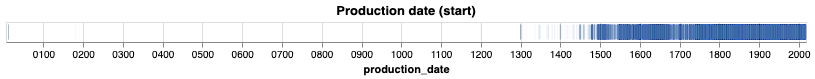

In [30]:
alt.Chart(pd.DataFrame(smk[
    (smk.production_date.notnull())
    & smk.production_date.dropna().map(lambda l: "start" in l[0])
].production_date.map(lambda l: l[0]['start'])).reset_index(),
          width=800,
          title="Production date (start)"
).mark_tick(opacity=0.05).encode(
    x='production_date:T'
#).transform_filter(
#    'datum.production_date > "1299-01-01"'
)

Getting `OutOfBound` errors when trying to get the start date to DateTime with `pd.datetime.fromisoformat`, in an attempt to filter out < 1300 artworks. Would be good though. Oh well, moving on.

From Luis on 2019-11-10 about filtering

> I have checked the data on the features that were given by Anders to focus on. Here are some notes:
> 
> 1. `has image` = `medium_image_url` in data set (44k out of 84k)
> 1. `image_native` or `iiif` (does not exist in the current dataset).
> 1. Public domain = copyright, no images are labeled as “public domain”, but 55k have nothing written on them. (31k images have blank copyright and an url)
> 1. `object_names` = `object_type_en` and `object_type_main_en`
> 1. `production_date` = `object_production_date_text_en` seem to be very inconsistent on how they save dates, so preprocessing is needed.
>
> It seems that using just these methods to check we have around 30,000 images to work with, from here we will be able to sample.

But I don't have those columns, and also Anders notes the same. Luis has been using `smk_all.csv`, rather than `smk_all_artworks.json`.

### The other dataset namely `smk_all.csv`

In [31]:
%%time
smk_all = pd.read_csv('smk_all.csv')
smk_all.shape

<string>:2: DtypeWarning: Columns (8,37,48,49,86,88,89,106) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 4.67 s, sys: 553 ms, total: 5.22 s
Wall time: 7.21 s


(84924, 115)

In [32]:
list(smk_all.columns)

['id',
 'artist_birth_en',
 'acq_date',
 'acq_date_earliest',
 'acq_date_eng',
 'acq_date_latest',
 'acq_method',
 'acq_note',
 'acq_reason',
 'acq_source',
 'artist_auth',
 'artist_birth_dk',
 'artist_death_dk',
 'artist_death_en',
 'artist_first_name',
 'artist_first_surname_firstname',
 'artist_name',
 'artist_name_text',
 'artist_natio_dk',
 'artist_natio_en',
 'artist_surname_firstname',
 'bagklaedning',
 'category',
 'currentlocationfitness',
 'citations',
 'comments',
 'content_notes',
 'copyright',
 'department',
 'description_note_dk',
 'dimension_billedmaal',
 'dimension_bladmaal',
 'dimension_brutto',
 'dimension_diameter',
 'dimension_monteringsmaal',
 'dimension_netto',
 'dimension_plademaal',
 'dimension_weight',
 'distinguishingfeatures',
 'ejer',
 'exhibitionvenues',
 'form',
 'foto_nr',
 'formeri',
 'id_text',
 'inscription_paaskrift',
 'inscription_samlermaerke',
 'inscription_signatur',
 'inscription_stoebemaerke',
 'inscription_stoebenummer',
 'inscription_tryktsign

So apparently `smk_all.csv` and `smk_all_artworks.json` are different datasets. Theory is that the former has all the artworks, the latter just digitized works.

### Summary of filtering data downloads

* [ ] All this filtering sounds like a Sankey graph actually :)
* [ ] Construct a filter.
* [ ] Converge on the data source to use, ie. the collection.

## SMK API

There is also https://api.smk.dk, with docs at https://api.smk.dk/api/v1/docs#/.